<h1>Tax cuts & Stock Market Instability</h1> 
<h3><center>Optimal Policy Term Paper</center></h3>

<center>Pau Belda-i-Tortosa</center>,


<center>January 2019</center>

<h3>Constant taxes in AMN (2016)</h3>

*This document contains the code of the one-time & Montecarlo simulations of the AMN(2016) with constant taxes on the budget contraint. The result is that taxes swallowed the volatility. 

Text(0,0.5,'PD ratio')

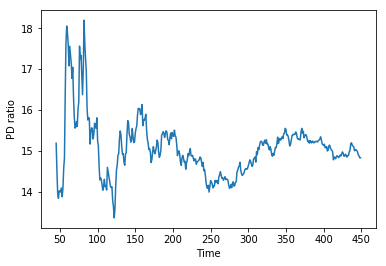

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed( 10 )
random.seed(10)

#Parameters
delta=0.999
sigma=5
a=1.0035
s_d=0.3
s_c=s_d/7
ρ=0.2
θ=0
λ1=0.4
λ2=0.3
λ3=0.3
U_PD=500
n=500

#True dgp for dividends:
log_eps_d=np.random.normal((-pow(s_d,2)/2),pow(s_d,2),n)
DG=np.zeros((n))
for i in range(n):
    DG[i]=a*np.exp(log_eps_d[i])

#True dgp for consumption
log_eps_c=np.random.normal((-pow(s_c,2)/2),pow(s_c,2),n)
cg=np.zeros((n))
for i in range(n):
    cg[i]=a*np.exp(log_eps_c[i])
    
#Price process learning: 
alpha=np.ones((n))*0.01
alpha[2]=1/50
for t in range(3,n):
    alpha[t]=alpha[t-1]+1

#Special beta's
beta_RE=pow(a,1-sigma)*np.exp(sigma*(1+sigma)*(s_c**2)/2)*np.exp(-sigma*ρ*s_c*s_d)
beta_R=pow(a,-sigma)*np.exp(sigma*(1+sigma)*(s_c**2)/2)

#Bounds for beta
beta_U = (U_PD- delta*a)/(U_PD*delta)
beta_L= pow(delta,-1) - 2*(pow(delta,-1) - beta_U)

# Weighting function for the projection facilities
def w(x):
    return beta_L + ((x-beta_L)/(x+beta_U-2*beta_L)*(beta_U - beta_L))


# Storage objects
beta=np.empty((n)) #vector to store beta's
beta[0]=beta_RE #we need two starting values for beta, to get the first price growth ratio. 
beta[1]=beta_RE
PG=np.empty((n)) #vector to store the rate of growth of prices
beta_pre=np.empty((n))

#Taxes
τ=np.ones((n))*0.3
   
#Self referential process:
for t in range(1,n-8):
    PG[t]=(1 + (((delta*beta[t]*pow((1-(λ1*(τ[t-2]-τ[t-3]) + λ2*(τ[t-1]-τ[t-2]) + λ3*(τ[t]-τ[t-1]))), θ)) - (delta*beta[t-1]*pow((1-(λ1*(τ[t-3]-τ[t-4]) + λ2*(τ[t-2]-τ[t-3]) + λ3*(τ[t-1]-τ[t-2]))), θ)))/(1-(delta*pow((1-(λ1*(τ[t-2]-τ[t-3]) + λ2*(τ[t-1]-τ[t-2]) + λ3*(τ[t]-τ[t-1]))), θ)*beta[t]))))*a*np.exp(log_eps_d[t])*((1-τ[t+1])/(1-τ[t]))                                               
    beta_pre[t+1]=beta[t]+((1/alpha[t+1])*((pow(cg[t],-sigma)*PG[t]/pow((1-(λ1*(τ[t-1]-τ[t-2]) + λ2*(τ[t]-τ[t-1]) + λ3*(τ[t+1]-τ[t]))), θ))-beta[t]))
    if beta_pre[t+1]<=beta_L: #Projection facilities
        beta[t+1]=beta_pre[t+1]      
    else: 
        beta[t+1]=w(beta_pre[t+1])

#PD ratio:
PD=np.empty((n))
for t in range(1,n-8):
    PD[t]=(delta*beta_RE*(1-τ[t+1]))/(1-(delta*pow((1-(λ1*(τ[t-2]-τ[t-3]) + λ2*(τ[t-1]-τ[t-2]) + λ3*(τ[t]-τ[t-1]))), θ)*beta[t]))
for t in range(0,n):
    if PD[t]<0:
        PD[t]=PD[t-1]

time=np.linspace(0,n-1,n)
plt.plot(time[45:450],PD[45:450])
plt.xlabel('Time')
plt.ylabel('PD ratio')

In [3]:
#Report statistics
E_PD= np.mean(PD[45:450])
ST_PD=np.std(PD[45:450])
CV_PD=ST_PD/E_PD
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))

ac=autocorr(PD[45:450])

#Print them
print('Expectation of PD ratio:', "{0:.2f}".format(E_PD))
print('Volatility of PD ratio:',"{0:.2f}".format(ST_PD))
print('Relative volatility OF PD ratio:', "{0:.2f}".format(CV_PD))
print('Persistence of PD ratio:', "{0:.2f}".format(ac[0,1]))

Expectation of PD ratio: 15.07
Volatility of PD ratio: 0.72
Relative volatility OF PD ratio: 0.05
Persistence of PD ratio: 0.95


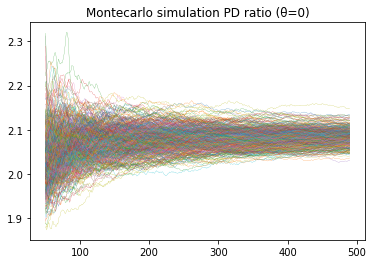

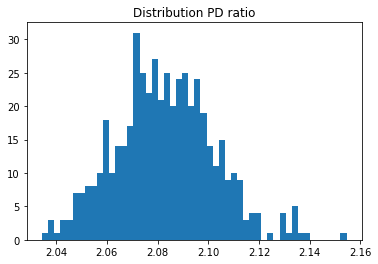

In [4]:
#Packages
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed( 10 )
random.seed(10)

#Parameters
delta=0.999
sigma=5
a=1.0035
s_d=0.3
s_c=s_d/7
ρ=0.2
θ=0
λ1=0.4
λ2=0.3
λ3=0.3
U_PD=500
n=500
time=np.linspace(0,n,n)
result=[]
rate=[]
excess=[]
bond=[]

#Montecarlo experiment: 500 simulations. 
for i in range(500):
    #True dgp for dividends:
    log_eps_d=np.random.normal((-pow(s_d,2)/2),pow(s_d,2),n)
    DG=np.zeros((n))
    for i in range(n):
        DG[i]=a*np.exp(log_eps_d[i])
        
    #True dgp for consumption
    log_eps_c=np.random.normal((-pow(s_c,2)/2),pow(s_c,2),n)
    cg=np.zeros((n))
    for i in range(n):
        cg[i]=a*np.exp(log_eps_c[i])


    #Price process learning: 
    alpha=np.ones((n))*0.01
    alpha[2]=1/50
    for t in range(3,n):
        alpha[t]=alpha[t-1]+1

    #Special beta's
    beta_RE=pow(a,1-sigma)*np.exp(sigma*(1+sigma)*(s_c**2)/2)*np.exp(-sigma*ρ*s_c*s_d)
    beta_R=pow(a,-sigma)*np.exp(sigma*(1+sigma)*(s_c**2)/2)

    #Bounds for beta
    beta_U = (U_PD- delta*a)/(U_PD*delta)
    beta_L= pow(delta,-1) - 2*(pow(delta,-1) - beta_U)

   # Weighting function for the projection facilities
    def w(x):
        return beta_L + ((x-beta_L)/(x+beta_U-2*beta_L)*(beta_U - beta_L))


    # Storage objects
    beta=np.empty((n)) #vector to store beta's
    beta[0]=beta_RE #we need two starting values for beta, to get the first price growth ratio. 
    beta[1]=beta_RE
    PG=np.empty((n)) #vector to store the rate of growth of prices
    beta_pre=np.empty((n))
    
    #Taxes
    τ=np.ones((n))*0.3
    
    #Self referential process:
    for t in range(1,n-1):
        PG[t]=(1 + (((delta*beta[t]*pow((1-(λ1*(τ[t-2]-τ[t-3]) + λ2*(τ[t-1]-τ[t-2]) + λ3*(τ[t]-τ[t-1]))), θ)) - (delta*beta[t-1]*pow((1-(λ1*(τ[t-3]-τ[t-4]) + λ2*(τ[t-2]-τ[t-3]) + λ3*(τ[t-1]-τ[t-2]))), θ)))/(1-(delta*pow((1-(λ1*(τ[t-2]-τ[t-3]) + λ2*(τ[t-1]-τ[t-2]) + λ3*(τ[t]-τ[t-1]))), θ)*beta[t]))))*a*np.exp(log_eps_d[t])*((1-τ[t+1])/(1-τ[t]))                                               
        beta_pre[t+1]=beta[t]+((1/alpha[t+1])*((pow(cg[t],-sigma)*PG[t]/pow((1-(λ1*(τ[t-1]-τ[t-2]) + λ2*(τ[t]-τ[t-1]) + λ3*(τ[t+1]-τ[t]))), θ))-beta[t]))
        if beta_pre[t+1]<=beta_L: #Projection facilities
            beta[t+1]=beta_pre[t+1]      
        else: 
            beta[t+1]=w(beta_pre[t+1])
        #PD ratio:
    pd=np.empty((n))
    for t in range(1,n-1):
        pd[t]=(delta*beta_RE*(1-τ[t+1]))/(1-(delta*(1-τ[t])*beta[t]))
    for t in range(0,n):
        if pd[t]<0:
            pd[t]=pd[t-1]



    #Returns process: 
    r=np.empty((n))
    r[0]= 0.05
    r[1]=0.05
    r[2]=0.05
    for t in range(1,n):
        r[t]=((pd[t]+1)/(pd[t-1]))*DG[t]-1
        if r[t]<0:
            r[t]=r[t-1]

    #Riskless return: 
    r_b=np.empty((n))
    r_b[0]= 0.05
    r_b[1]=0.05
    for t in range(1,n):
        r_b[t]=pow(delta*beta_R,-1)-1

    #Excess return
    x=np.empty((n))
    for t in range(n):
        x[t]=r[t]-r_b[t]
    

    plt.plot(time[50:490],pd[50:490], linewidth=0.2)
    result.append(pd[-100]) #Append the before-ending value of each simulation. 
    rate.append(r[-2])
    bond.append(r_b[-2])
    excess.append(x[-2])

plt.title('Montecarlo simulation PD ratio (θ=0)')
plt.show()

#create histogram of ending stock values for our multiple simulations
plt.hist(result,bins=50)
plt.title('Distribution PD ratio')
plt.show()

In [3]:
E_PD= np.mean(result[45:450])
ST_PD=np.std(result[45:450])
CV_PD=ST_PD/E_PD
E_DG= np.mean(DG)
ST_DG= np.std(DG)
CV_DG=ST_DG/E_DG
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))

ac=autocorr(result[45:450])

#Print them
print('Expectation of PD ratio:', "{0:.2f}".format(E_PD))
print('Volatility of PD ratio:',"{0:.2f}".format(ST_PD))
print('Relative volatility OF PD ratio:', "{0:.2f}".format(CV_PD))
print('Persistence of PD ratio:', "{0:.2f}".format(ac[0,1]))
print('Expectation of DG:', "{0:.2f}".format(E_DG))
print('Volatility of DG:', "{0:.2f}".format(ST_DG))
print('Relative volatility of DG:', "{0:.2f}".format(CV_DG))

Expectation of PD ratio: 2.08
Volatility of PD ratio: 0.02
Relative volatility OF PD ratio: 0.01
Persistence of PD ratio: -0.06
Expectation of DG: 0.96
Volatility of DG: 0.08
Relative volatility of DG: 0.09
